<a href="https://colab.research.google.com/github/rproner1/MATH4060/blob/main/midtermProj1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Project 1

## Problem 1

On any given day, it is either rainy or sunny. A mo del for the weather is the
following rules which are applied in order (i.e. rule 1 is applied if p ossible; if it
is do es not apply, then rule 2 is applied etc.)

1. If it is sunny today and it was sunny yesterday, then the forecast for the
next day is 50% rainy - 50% sunny.
2. If it is sunny today, but it was rainy yesterday, then the forecast for the
next day is 30% rainy - 70% sunny
3. Otherwise, if has been rainy for three days in a row, the forecast for the
next day is 10% rainy - 90% sunny.
4. Otherwise, if has been rainy for two days in a row, the forecast for the
next day is 25% rainy - 75% sunny.
5. Otherwise, if it is rainy today, the forecast for the next day is 40% rainy - 60% sunny.

a) Find a Markov chain to model this problem. Be sure to clearly indicate
the state space you are using is, what the transition matrix is and draw the
corresponding directed graph of the Markov chain.

b) Write a program that inputs an integer n and uses Monte Carlo method to
find the approximate probability that it is rainy n days from now given that it is sunny today and sunny yesterday. Be sure to report error bars on your estimate and clearly explain what the error bars you are using mean. Use enough samples to get this probability accurate to 3 decimal places. Also report the number of samples per second your method gets.

c) Write a program that inputs an integer n and outputs the exact (up to
computer precision) probability that it is rainy n days from now given that it is sunny today. Draw a graph of this probability as function of $n$ for $n \in [0, 100]$.

d) Use a computer to calculate the exact value of
$ \lim_{n\to ∞}P(\text{Rainy on day n}|\text{Sunny today and sunny yesterday})$


## Solution 1

### a) 
The above is not a Markov process. However, we can transform it into one but considering the state space $S = \{\text{SSS, RSS, SRS, RRS, RRR, SRR, SSR, RSR}\}$. Let the above list of scenarios be the possible states, and let them be denoted by $S_i;\ i = 1, ..., 5$, where $S_i$ is the $i$th state. For example, sunny today and sunny yesterday is state 1, $S_1 = \{\text{SSS, RSS}\}$ (some states have more than one possible arrangment). The transition matrix is:

\begin{bmatrix}
  0.5 & 0 & 0 & 0 & 0.5 \\
  0.7 & 0 & 0 & 0 & 0.3 \\
  0 & 0.9 & 0.1 & 0 & 0 \\
  0 & 0.75 & 0.25 & 0 & 0 \\
  0 & 0.6 & 0 & 0.4 & 0
\end{bmatrix}

We can represent this Markov chain by the directed graph depicted below


### b)

In [ ]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [ ]:
def monteCarlo(nSim, nforecast, v0, P, plot=False, state='R'):
  """
  Runs a Monte Carlo simulation and returns the probability that it is rainy n days from now given that it is sunny today and sunny yesterday.

  Parameters:
  nSim (int): Number of simulations.
  nforecast (int): The n-day forecast horizon.
  v0 (float array): Initial 1 x K state vector.
  P (float array): K x K Transition probability matrix.
  plot (bool): If True, plot's the probabilities of being in state on day n.
  state: State of interest on day n.

  Returns:
  expectedVn (float array): Expected nth-day probability vector.
  var (float array): Estimated variance vector.
  """
  sumVn = jnp.zeros(shape=(5,), dtype=float)
  sumVnSq = jnp.zeros(shape=(5,), dtype=float)
  for i in range(nSim):
    vni = jnp.matmul(v0, jnp.linalg.matrix_power(P, nforecast))
    sumVn += vni
    sumVnSq += vni**2

  expectedVn = sumVn / nSim
  expectedVnSq = sumVnSq / nSim 
  var = expectedVnSq - expectedVn**2

  if plot == True:
    probs = []
    for i in range(nSim):
      vni = jnp.matmul(v0, jnp.linalg.matrix_power(P, nforecast))
      if state == 'R':
        p = vni[2:].sum()
        print(p)
      elif state == 'S':
        p = vni[:2].sum()
      else:
        print("Error: Not a valid state.")
        break
    
    plt.plot(list(range(1, nSim+1)), probs)
      

  return expectedVn, var

0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853
0.38536853

ValueError: ignored

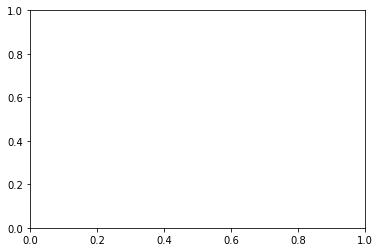

In [ ]:
# initial state vector
v0 = jnp.array([1, 0, 0., 0., 0.])

# transition matrix
P = jnp.array([[0.5, 0., 0., 0., 0.5],
               [0.7, 0., 0., 0., 0.3],
               [0., 0.9, 0.1, 0., 0.],
               [0, 0.75, 0.25, 0., 0.],
               [0., 0.6, 0., 0.4, 0.]])

monteCarlo(100, 7, v0, P, plot=True)

### c)

In [ ]:
# initial state vector
v0 = jnp.array([1, 0, 0., 0., 0.])

# transition matrix
P = jnp.array([[0.5, 0., 0., 0., 0.5],
               [0.7, 0., 0., 0., 0.3],
               [0., 0.9, 0.1, 0., 0.],
               [0, 0.75, 0.25, 0., 0.],
               [0., 0.6, 0., 0.4, 0.]])

In [ ]:
n = int(input())

5


In [ ]:
vn = jnp.matmul(v0, jnp.linalg.matrix_power(P, n))
print("Probability of rain on day " + str(n) + ": " + str(vn[3] + vn[4] + vn[5]))

Probability of rain on day 5: 0.6299


### d)

Every Markov chain has a stationary distribution which satisfies

$$
\mathbf{v}_\infty = \mathbf{v}_\infty \cdot \mathbf{\text{P}} 
$$

where $\mathbf{v}_\infty = \lim_{n \to \infty} \mathbf{v}_n = \lim_{n \to \infty} \mathbf{v}_0 \cdot \mathbf{\text{P}}^n$
\begin{align}
  [p_1, p_2, p_3, p_4, p_5] &= [p_1, p_2, p_3, p_4, p_5] \begin{bmatrix}
  0.5 & 0 & 0 & 0 & 0.5 \\
  0.7 & 0 & 0 & 0 & 0.3 \\
  0 & 0.9 & 0.1 & 0 & 0 \\
  0 & 0.75 & 0.25 & 0 & 0 \\
  0 & 0.6 & 0 & 0.4 & 0
\end{bmatrix}
\end{align}
 
 Thus we have five equations in five unknowns
\begin{align}
0.5p_1 + 0.7p_2 &= p_1 \implies -0.5p_1 + 0.7p_2 &= 0 \qquad (1)\\
0.9p_3 + 0.75p_4 + 0.6p_5 &= p_2 \implies -p_2 + 0.9p_3 + 0.75p_4 + 0.6p_5 & = 0\qquad (2) \\
0.1p_3 + 0.25p_4 &= p_3 \implies -0.9p_3 +0.25p_4 &= 0 \qquad (3) \\
0.4p_5 &= p_4 \implies -p_4 + 0.4p_5 &= 0 \qquad (4)\\
0.5p_1 + 0.3p_2 &= p_5 \implies 0.5p_1 + 0.3p_2 - p_5 &= 0\qquad (5)
\end{align}

And so we have the form $\text{A}\mathbf{x} = \mathbf{b}$ where 
$$\text{A} = \begin{bmatrix}
-0.5 & 0.7 & 0 & 0 & 0\\
0 & -1 & 0.9 & 0.75 & 0.6\\
0 & 0 & -0.9 & 0.25 & 0\\
0 & 0 & 0 & -1 & 0.4\\
0.5 & 0.3 & 0 & 0 & -1\\
\end{bmatrix};
\qquad\mathbf{x}= [p_1, p_2, p_3, p_4, p_5];
\qquad\mathbf{b} = \mathbf{0}
$$

In [ ]:
a = jnp.array([[-0.5, 0.7, 0., 0., 0.],
               [0., -1., 0.9, 0.75, 0.6],
               [0., 0., -0.9, 0.25, 0.],
               [0., 0., 0., -1., 0.4],
               [0.5, 0.3, 0., 0., -1.]])

b = [0., 0., 0., 0., 0.]

v_infty = jnp.linalg.solve(a, b)
print(v_infty)

[nan nan nan nan nan]
